In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Instead of a report, I explained each step as text in this code.

In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import collections
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter,defaultdict
import math
import tqdm
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import time
from sklearn.model_selection import train_test_split
from google.colab import files

nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [ ]:
%cd /content/drive/My Drive/Data

/content/drive/My Drive/Data


In [ ]:
with open('cbt_train.txt', 'r') as f:
    lines = f.readlines()

start_title = "_BOOK_TITLE_ : Andrew_Lang___The_Crimson_Fairy_Book.txt.out"
end_title = "_BOOK_TITLE_ : Andrew_Lang___The_Lilac_Fairy_Book.txt.out"

start_found = False

text = ""

for line in lines:
    if not start_found:
        if start_title in line:
            start_found = True
    else:
        if end_title in line:
            break
        else:
            text += line


In the above code, Andrew Lange's The Crimson Fairy Book was retrieved and the BOOK TITLE parts were removed

In [ ]:
text =re.sub(r"(?m)^(\_BOOK_TITLE\_|CHAPTER).*\n?","",text,re.MULTILINE) # some preprocessing but not all

In [ ]:
pattern = r'\b\w*\.jpg\w*\b'

# Search for the pattern in the text using the re.search() function
match = re.search(pattern, text)

# Check if the pattern was found
if match:
    print("Pattern found:", match.group(0))
else:
    print("Pattern not found.")

Pattern not found.


No image annotations

In [ ]:
pattern = r'\b\w*CHAPTER\w*\b'

# Search for the pattern in the text using the re.search() function
match = re.search(pattern, text)

# Check if the pattern was found
if match:
    print("Pattern found:", match.group(0))
else:
    print("Pattern not found.")

Pattern not found.


No Chapter title pattern found

In [ ]:
page_pattern = r'\bp\d+\b'
match = re.search(page_pattern, text)

# Check if the pattern was found
if match:
    print("Pattern found:", match.group(0))
else:
    print("Pattern not found.")

Pattern not found.


No page number patter.

In [ ]:
bracket_pattern = r'-LSB-\s*(.*?)\s*-RSB-'

match = re.search(bracket_pattern, text)

# Check if the pattern was found
if match:
    print("Pattern found:", match.group(0))
else:
    print("Pattern not found.")


Pattern found: -LSB- From Ungarische Mahrehen . -RSB-


In [ ]:
text = text.replace("-LSB-", "").replace("-RSB-", "")




In [ ]:
bracket_pattern = r'-LSB-\s*(.*?)\s*-RSB-'

match = re.search(bracket_pattern, text)

# Check if the pattern was found
if match:
    print("Pattern found:", match.group(0))
else:
    print("Pattern not found.")

Pattern not found.


Deleting -LSB and -RSB parts in the text

In [ ]:
sentence_tokens= sent_tokenize(text.lower())

In [ ]:
sentence_tokens[0:10]

["lovely ilonka there was once a king 's son who told his father that he wished to marry .",
 "` no , no ! '",
 'said the king ; ` you must not be in such a hurry .',
 'wait till you have done some great deed .',
 "my father did not let me marry till i had won the golden sword you see me wear . '",
 'the prince was much disappointed , but he never dreamed of disobeying his father , and he began to think with all his might what he could do .',
 'it was no use staying at home , so one day he wandered out into the world to try his luck , and as he walked along he came to a little hut in which he found an old woman crouching over the fire .',
 '` good evening , mother .',
 "i see you have lived long in this world ; do you know anything about the three bulrushes ? '",
 "` yes , indeed , i 've lived long and been much about in the world , but i have never seen or heard anything of what you ask ."]

I split the text into sentences using the nltk library

In [ ]:
word_token =[word_tokenize(token) for token in sentence_tokens]

In [ ]:
print(word_token[0])

['lovely', 'ilonka', 'there', 'was', 'once', 'a', 'king', "'s", 'son', 'who', 'told', 'his', 'father', 'that', 'he', 'wished', 'to', 'marry', '.']


word_token list has sentences as lists.

In [ ]:
token_list = [tok  for sent in word_token  for tok in sent ]

In [ ]:
len(token_list)

113786

token_list has all the tokens(words) in text and has 113786 tokens

In [ ]:
token_list = [re.sub(r'\W+', '', item) for item in token_list if re.sub(r'\W+', '', item)]

In [ ]:
word_token_list = []
for sent in word_token:
    token_list_2 = [re.sub(r'\W+', '', item) for item in sent if re.sub(r'\W+', '', item)]
    word_token_list.append(token_list_2)

In [ ]:
len(token_list)

97850

The code above is made for the future BPE algorithm. There is a list called symbols in the BPE algorithm to be used in the future. In this list of symbols, all symbols used in the text are primarily defined as letters in the alphabet, "_" and [UNK]. But there are many non-word characters in this text. (like ".",";" etc.) Therefore, instead of assigning all used symbols to the symbols list, these symbols have been removed with the re library. If a token contains these nonword characters, this character has been removed. There are also some stand-alone nonword characters. (for example one token is directly ",") Therefore, if the token turns into an empty string after this operation, that token is not included. Adding these characters to the symbols list would be another solution.

In [ ]:
for i in range(len(word_token_list)):
    for j in range(len(word_token_list[i])):
        word_token_list[i][j] = word_token_list[i][j] + "_"

In [ ]:
word_token_list[0]

['lovely_',
 'ilonka_',
 'there_',
 'was_',
 'once_',
 'a_',
 'king_',
 's_',
 'son_',
 'who_',
 'told_',
 'his_',
 'father_',
 'that_',
 'he_',
 'wished_',
 'to_',
 'marry_']

In [ ]:
for i in range(len(token_list)):
    token_list[i] = token_list[i] + '_'

In both lists above, "_" has been added to the end of all tokens. This is for BPE algorithm

In [ ]:
len(set(token_list))

5248

5248 different words appear in text

In [ ]:
token_list[:5]

['lovely_', 'ilonka_', 'there_', 'was_', 'once_']

**BPE ALGORITHM**

In [ ]:
raw_token_freqs = {}

for word in token_list:
    if word in raw_token_freqs:
        raw_token_freqs[word] += 1
    else:
        raw_token_freqs[word] = 1

print(raw_token_freqs)

{'lovely_': 22, 'ilonka_': 12, 'there_': 295, 'was_': 1443, 'once_': 167, 'a_': 1902, 'king_': 545, 's_': 415, 'son_': 163, 'who_': 368, 'told_': 141, 'his_': 1514, 'father_': 170, 'that_': 1129, 'he_': 2621, 'wished_': 29, 'to_': 2997, 'marry_': 34, 'no_': 350, 'said_': 519, 'the_': 6837, 'you_': 1124, 'must_': 143, 'not_': 693, 'be_': 510, 'in_': 1283, 'such_': 75, 'hurry_': 9, 'wait_': 19, 'till_': 166, 'have_': 501, 'done_': 86, 'some_': 212, 'great_': 132, 'deed_': 5, 'my_': 428, 'did_': 207, 'let_': 98, 'me_': 358, 'i_': 928, 'had_': 988, 'won_': 5, 'golden_': 45, 'sword_': 68, 'see_': 165, 'wear_': 5, 'prince_': 326, 'much_': 103, 'disappointed_': 2, 'but_': 793, 'never_': 137, 'dreamed_': 10, 'of_': 1717, 'disobeying_': 1, 'and_': 4211, 'began_': 87, 'think_': 41, 'with_': 686, 'all_': 508, 'might_': 102, 'what_': 317, 'could_': 271, 'do_': 297, 'it_': 1028, 'use_': 33, 'staying_': 5, 'at_': 670, 'home_': 145, 'so_': 528, 'one_': 393, 'day_': 173, 'wandered_': 28, 'out_': 395, 

In [ ]:
symbols = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',
           'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z',
           '_', '[UNK]',"0","1","2","3","4","5","6","7","8","9"]

In [ ]:
token_freqs = {}
for token, freq in raw_token_freqs.items():
    token_freqs[' '.join(list(token))] = raw_token_freqs[token]

In [ ]:
def get_max_freq_pair(token_freqs):
    pairs = collections.defaultdict(int)
    for token, freq in token_freqs.items():
        symbols = token.split()
        for i in range(len(symbols) - 1):
            # Key of `pairs` is a tuple of two consecutive symbols
            pairs[symbols[i], symbols[i + 1]] += freq
    return max(pairs, key=pairs.get)  # Key of `pairs` with the max value

In [ ]:
def merge_symbols(max_freq_pair, token_freqs, symbols):
    merged_symbol = ''.join(max_freq_pair)
    symbols.append(merged_symbol)
    new_token_freqs = dict()
    for token, freq in token_freqs.items():
        pattern = r'\b' + re.escape(max_freq_pair[0]) + r' ' + re.escape(max_freq_pair[1]) + r'(?!\S)\b'
        new_token = re.sub(pattern, merged_symbol, token)
        new_token_freqs[new_token] = token_freqs[token]
    return new_token_freqs





The merge symbols function above has been changed due to the problem stated in the assigment. By using the Re library, if there is already a subword, it is provided to be looked at as a whole. (For example, the string "a" is checked whether it is alone or not /b checks whether it is a whitespace after "a". Thus, if it is in the "al" state, it does not take it because there is no whitespace after the "a" string)

In [ ]:
num_merges = 1000
for i in range(num_merges):
    max_freq_pair = get_max_freq_pair(token_freqs)
    token_freqs = merge_symbols(max_freq_pair, token_freqs, symbols)
    if i % 10 == 0:
      print(f'merge #{i + 1}:', max_freq_pair)

merge #1: ('e', '_')
merge #11: ('y', '_')
merge #21: ('o', 'r')
merge #31: ('ll', '_')
merge #41: ('e', 'n')
merge #51: ('o', 'n_')
merge #61: ('r', 'o')
merge #71: ('l', 'i')
merge #81: ('i', 'd_')
merge #91: ('m', 'a')
merge #101: ('w', 'a')
merge #111: ('s', 'o_')
merge #121: ('m', 'an_')
merge #131: ('w', 'hi')
merge #141: ('i', 'r')
merge #151: ('g', 'a')
merge #161: ('n', 'o_')
merge #171: ('l', 'o')
merge #181: ('i', 'r_')
merge #191: ('m', 'u')
merge #201: ('s', 'w')
merge #211: ('er', 's_')
merge #221: ('a', 's')
merge #231: ('ti', 'me_')
merge #241: ('ca', 'me_')
merge #251: ('an', 'y_')
merge #261: ('n', 'ing_')
merge #271: ('t', 'w')
merge #281: ('t', 'o')
merge #291: ('h', 'ou')
merge #301: ('th', 'an_')
merge #311: ('x', '_')
merge #321: ('as', 'ked_')
merge #331: ('m', 'ar')
merge #341: ('m', 'on')
merge #351: ('d', 'y_')
merge #361: ('g', 're')
merge #371: ('h', 'un')
merge #381: ('ll', 'y_')
merge #391: ('f', 't_')
merge #401: ('si', 'de_')
merge #411: ('g', 'u')
merg

I use 5000 (vocabulary size) and 500 for num_merges. When I use 5000 there is so many symbols with full words. When I use 500 there are not much sybols. So I use 1000. When I look in literature it seen as a hyperparameter and using different values to get the optimum value is done usually. I directly select 1000.

In [ ]:
print(symbols)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '_', '[UNK]', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'e_', 'd_', 'th', 't_', 's_', 'an', 'the_', 'in', 'er', 'o_', 'y_', 'ou', 'and_', 'ed_', 'n_', 'er_', 'hi', 'g_', 'to_', 'he_', 'or', 'll', 'ea', 'f_', 'ing_', 'ha', 'as_', 'a_', 'm_', 'on', 'll_', 'en_', 'at_', 'you', 'of_', 'st', 'in_', 'wi', 'ar', 'ow', 'en', 'his_', 'me_', 'was_', 'ld_', 'the', 'wh', 're', 'for', 'an_', 'on_', 'gh', 'ch', 'k_', 'it_', 'th_', 'that_', 'you_', 'st_', 'se', 'ro', 'be', 'ce_', 've_', 'sa', 'bu', 'had_', 'r_', 'ere_', 'i_', 'li', 'ri', 'ly_', 'him_', 'no', 'le_', 'la', 'ti', 'for_', 'oo', 'id_', 'is_', 'es_', 'but_', 'sh', 'se_', 'king_', 'ch_', 'p_', 'ther_', 'ma', 'ould_', 'one_', 'ght_', 'not_', 'with_', 'her_', 'ow_', 'si', 'they_', 'wa', 'rea', 'ca', 'ne', 'out_', 'ur', 'l_', 'tt', 'she_', 'ome_', 'so_', 'when_', 'ear', 'ra', 'oun', 'all_', 'ver_', 'pr', 'b

In [ ]:
print(list(token_freqs.keys()))

['lo vely_', 'i lon k a_', 'there_', 'was_', 'once_', 'a_', 'king_', 's_', 'son_', 'who_', 'told_', 'his_', 'father_', 'that_', 'he_', 'wi shed_', 'to_', 'marry_', 'no_', 'said_', 'the_', 'you_', 'must_', 'not_', 'be_', 'in_', 'such_', 'h ur ry_', 'wa it_', 'till_', 'have_', 'done_', 'some_', 'great_', 'deed_', 'my_', 'did_', 'let_', 'me_', 'i_', 'had_', 'w on_', 'golden_', 'sword_', 'see_', 'w ear_', 'prince_', 'much_', 'di sa pp o in ted_', 'but_', 'never_', 'drea med_', 'of_', 'di so be ying_', 'and_', 'began_', 'think_', 'with_', 'all_', 'might_', 'what_', 'could_', 'do_', 'it_', 'use_', 'sta ying_', 'at_', 'home_', 'so_', 'one_', 'day_', 'wand ered_', 'out_', 'into_', 'world_', 'try_', 'lu ck_', 'as_', 'wa lked_', 'along_', 'came_', 'little_', 'h ut_', 'which_', 'found_', 'an_', 'old_', 'woman_', 'c rou ching_', 'over_', 'fire_', 'good_', 'evening_', 'mother_', 'lived_', 'long_', 'this_', 'know_', 'anything_', 'about_', 'three_', 'bu l ru shes_', 'yes_', 'indeed_', 've_', 'been_',

In [ ]:
def segment_BPE(tokens, symbols):
    outputs = []
    for token in tokens:
        start, end = 0, len(token)
        cur_output = []
        # Segment token with the longest possible subwords from symbols
        while start < len(token) and start < end:
            if token[start: end] in symbols:
                cur_output.append(token[start: end])
                start = end
                end = len(token)
            else:
                end -= 1
        if start < len(token):
            cur_output.append('[UNK]')
        outputs.append(' '.join(cur_output))
    return outputs


In [ ]:
vocabulary = segment_BPE(token_list, symbols)

In [ ]:
vocabulary[:100]

['lo vely_',
 'il on k a_',
 'there_',
 'was_',
 'once_',
 'a_',
 'king_',
 's_',
 'son_',
 'who_',
 'told_',
 'his_',
 'father_',
 'that_',
 'he_',
 'wi shed_',
 'to_',
 'marry_',
 'no_',
 'no_',
 'said_',
 'the_',
 'king_',
 'you_',
 'must_',
 'not_',
 'be_',
 'in_',
 'such_',
 'a_',
 'hu r ry_',
 'wait _',
 'till_',
 'you_',
 'have_',
 'done_',
 'some_',
 'great_',
 'deed_',
 'my_',
 'father_',
 'did_',
 'not_',
 'let_',
 'me_',
 'marry_',
 'till_',
 'i_',
 'had_',
 'won _',
 'the_',
 'golden_',
 'sword_',
 'you_',
 'see_',
 'me_',
 'we ar_',
 'the_',
 'prince_',
 'was_',
 'much_',
 'dis app o in ted_',
 'but_',
 'he_',
 'never_',
 'drea med_',
 'of_',
 'dis o be ying_',
 'his_',
 'father_',
 'and_',
 'he_',
 'began_',
 'to_',
 'think_',
 'with_',
 'all_',
 'his_',
 'might_',
 'what_',
 'he_',
 'could_',
 'do_',
 'it_',
 'was_',
 'no_',
 'use_',
 'sta ying_',
 'at_',
 'home_',
 'so_',
 'one_',
 'day_',
 'he_',
 'wand ered_',
 'out_',
 'into_',
 'the_',
 'world_',
 'to_']

This vocabulary will be used for model after using BPE algorithm

In [ ]:
sent_vocab = []
for sent_token in word_token_list:
  sent_vocab.append(segment_BPE(sent_token,symbols))


In [ ]:
sent_vocab[0]

['lo vely_',
 'il on k a_',
 'there_',
 'was_',
 'once_',
 'a_',
 'king_',
 's_',
 'son_',
 'who_',
 'told_',
 'his_',
 'father_',
 'that_',
 'he_',
 'wi shed_',
 'to_',
 'marry_']

sent_vocab is for negative sampling part. To get pairs

In [ ]:
len(vocabulary)

97850

In [ ]:
occurances_array = np.array(list(token_freqs.values()))


In [ ]:
# Minimum value
print("Min:", np.min(occurances_array))

# Maximum value
print("Max:", np.max(occurances_array))

# Mean value
print("Mean:", np.mean(occurances_array))

# Median value
print("Median:", np.median(occurances_array))

# Standard deviation
print("Std:", np.std(occurances_array))


Min: 1
Max: 6837
Mean: 18.645198170731707
Median: 2.0
Std: 145.25662436026798


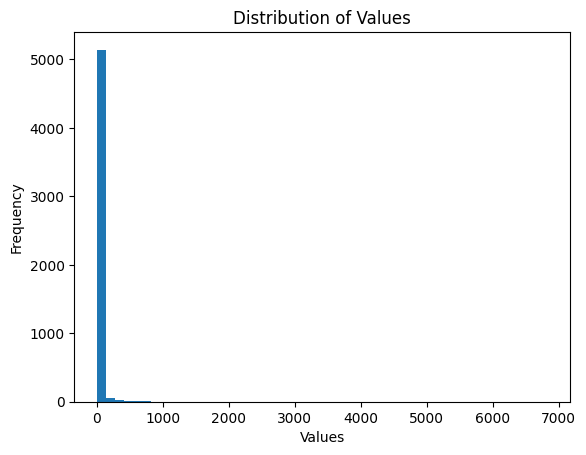

In [ ]:
plt.hist(occurances_array, bins=50)
plt.title("Distribution of Values")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.show()

In [ ]:
bin_size = 200

# Create bins
bins = np.arange(0, 7100, bin_size)

# Count number of values in each bin
hist, _ = np.histogram(occurances_array, bins=bins)

# Print the count for each bin
for i in range(len(hist)):
    print(f"{bins[i]}-{bins[i]+bin_size}: {hist[i]} values")


0-200: 5179 values
200-400: 33 values
400-600: 13 values
600-800: 6 values
800-1000: 5 values
1000-1200: 3 values
1200-1400: 1 values
1400-1600: 2 values
1600-1800: 1 values
1800-2000: 1 values
2000-2200: 0 values
2200-2400: 0 values
2400-2600: 0 values
2600-2800: 1 values
2800-3000: 1 values
3000-3200: 0 values
3200-3400: 0 values
3400-3600: 0 values
3600-3800: 0 values
3800-4000: 0 values
4000-4200: 0 values
4200-4400: 1 values
4400-4600: 0 values
4600-4800: 0 values
4800-5000: 0 values
5000-5200: 0 values
5200-5400: 0 values
5400-5600: 0 values
5600-5800: 0 values
5800-6000: 0 values
6000-6200: 0 values
6200-6400: 0 values
6400-6600: 0 values
6600-6800: 0 values
6800-7000: 1 values


As can be seen, most words are used in the text 0-200 times. The word frequency distribution has a skewed distribution. The word "the" has been used around 7000 times and is by far the most used word. Sub sampling, an algorithm that will increase the probability of removing such words, is applied below. The subsampling function applied in the lab is used

In [ ]:
words = tuple(set(vocabulary))
int2str = dict(enumerate(words))
str2int = {ch: i for i, ch in int2str.items()}

In [ ]:
print('Length of the vocabulary: ', len(words))
words[0:10]

Length of the vocabulary:  5248


('give_',
 'bo ys_',
 'br ea th_',
 'sta g ge red_',
 'luck ily_',
 'wor ld s_',
 's la p_',
 'sa ddle_',
 'pre sen ce_',
 'ar m cha ir_')

In [ ]:
wordFreq = defaultdict(int)
for sent in sent_vocab:
    for word in sent:
        wordFreq[word] += 1

In [ ]:
totalWords = sum([freq for freq in wordFreq.values()])
wi = {word:(freq/totalWords) for word, freq in wordFreq.items()}
wordProb ={ word:(math.sqrt(wi[word]/0.001)+1)*0.001/wi[word]  for word in wi}

In [ ]:
posSet = [] 
dropped = 0
for sent in sent_vocab:
  dum_sent = sent.copy()
  for i in range(len(dum_sent)-1):
    if   np.random.rand()>wordProb[dum_sent[i]]:
        dum_sent[i] = None
        dropped +=1
  for i in range(1, len(dum_sent)-2):
      if(dum_sent[i]!= None):
        if(dum_sent[i+1]!= None):
          posSet.append((dum_sent[i], dum_sent[i+1]))
        if(dum_sent[i-1]!= None):
          posSet.append((dum_sent[i], dum_sent[i-1]))
print(dropped)
posSet[0:10]

29067


[('il on k a_', 'there_'),
 ('il on k a_', 'lo vely_'),
 ('there_', 'il on k a_'),
 ('s_', 'son_'),
 ('son_', 'who_'),
 ('son_', 's_'),
 ('who_', 'told_'),
 ('who_', 'son_'),
 ('told_', 'who_'),
 ('king_', 'you_')]

In [ ]:
n_pos_examples = len(posSet)
len(posSet)

76785

In [ ]:
totalWords = sum([freq**(3/4) for freq in wordFreq.values()])
wordProb = {word:(freq**(3/4)/totalWords) for word, freq in wordFreq.items()}

In [ ]:
n_neg_examples = 0 # 40m run time
negSet = []
for i in tqdm.tqdm(range(n_pos_examples)):
  context=np.random.choice(list(wordProb.keys()), p=list(wordProb.values())) 
  while ((posSet[i][0],context)  in posSet):
    context=np.random.choice(list(wordProb.keys()), p=list(wordProb.values()))
  negSet.append((posSet[i][0], context))

100%|██████████| 76785/76785 [04:27<00:00, 287.58it/s]


In [ ]:
len(negSet)


76785

In [ ]:
pos_data = pd.DataFrame(posSet,columns=["word","context"])
pos_data["out"] = 1
pos_data.head()

,word,context,out
0,il on k a_,there_,1
1,il on k a_,lo vely_,1
2,there_,il on k a_,1
3,s_,son_,1
4,son_,who_,1


In [ ]:
neg_data = pd.DataFrame(negSet,columns=["word","context"])
neg_data["out"] = 0
neg_data.head()

,word,context,out
0,il on k a_,down_,0
1,il on k a_,himself_,0
2,there_,before_,0
3,s_,in ven t_,0
4,son_,seem _,0


In [ ]:
data = pd.concat([pos_data,neg_data],axis=0)
data.describe()

,out
count,153570.000000
mean,0.500000
std,0.500002
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [ ]:
data2 = data.copy()
data2["text"] =  data["word"]+' '+data["context"]
data2.head(1000)
     

,word,context,out,text
0,il on k a_,there_,1,il on k a_ there_
1,il on k a_,lo vely_,1,il on k a_ lo vely_
2,there_,il on k a_,1,there_ il on k a_
3,s_,son_,1,s_ son_
4,son_,who_,1,son_ who_
...,...,...,...,...
995,fea r s_,no_,1,fea r s_ no_
996,supp er_,that_,1,supp er_ that_
997,supp er_,at_,1,supp er_ at_
998,that_,night_,1,that_ night_


In [ ]:
data3 =data2.drop(columns=["context","word"])
data3 = data3[["text","out"]]
data3.head()

,text,out
0,il on k a_ there_,1
1,il on k a_ lo vely_,1
2,there_ il on k a_,1
3,s_ son_,1
4,son_ who_,1


In [ ]:
data.to_csv("data_all.csv",index=False)
files.download("data_all.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

A dataframe was created for future use. This dataframe has columns center word, context word and label. I used this dataframe as it will be easier to use

In [ ]:
dataset = pd.read_csv("data_all.csv")

In [ ]:
def one_hot_encoding(word_idx, vocab_size):
    one_hot = torch.zeros(vocab_size)
    one_hot[word_idx] = 1
    return one_hot

In the model, one_hot_encoding of each word is used by using the str2int dictionary.

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
vocab_size = len(words)

In [ ]:
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

train_data, test_data = train_test_split(dataset, test_size=test_ratio, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=val_ratio/(train_ratio+val_ratio), random_state=42)

# print sizes of each set
print(f"Training data size: {len(train_data)}")
print(f"Validation data size: {len(val_data)}")
print(f"Test data size: {len(test_data)}")

Training data size: 122855
Validation data size: 15358
Test data size: 15357


The data set is divided into training, validation and test sets with 0.8, 0.1 and 0.1 percentiles.

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, data):
        self.data = data
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        center_word, context_word, label = self.data.iloc[index]
        
        # Convert center and context words to one-hot encodings
        center_onehot = one_hot_encoding(str2int[center_word], vocab_size)
        context_onehot = one_hot_encoding(str2int[context_word], vocab_size)
        
        # Concatenate the two one-hot encodings
        input_vector = torch.cat([center_onehot, context_onehot]).to(device)
        
        # Convert label to tensor
        label = torch.tensor(label).to(device)
        
        return input_vector, label

While making the model, the skip-gram with negative sampling (SGNS) with logistic regression logic shown in the Lecture notes was used. In the model, two separate one hot encoding vectors for center and context word pairs will be taken and combined. The input vector will consist of 2 separate one hot endoding vectors belonging to the words center and context. Its length is equal to 2 * vocabulary size. The above class was created to make the dataset available to the Dataloader function. The input vector and label are made as described above.

In [ ]:
train_dataset = CustomDataset(train_data)

In [ ]:
val_dataset = CustomDataset(val_data)
test_dataset = CustomDataset(test_data)

In [ ]:
batch_size = 64
train_dataloader = DataLoader(train_dataset, batch_size=batch_size,
                              shuffle=True)
valid_dataloader = DataLoader(val_dataset, batch_size=batch_size,
                              shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size,
                             shuffle=True)

Each dataset was created to be divided into 64 batches with the dataloader function.

In [ ]:
def train(dataloader,model):
    model.train()
    total_acc, total_count = 0, 0
    total_loss = 0
    log_interval = 500
    start_time = time.time()

    for idx, (input_vector, label) in enumerate(dataloader):
        optimizer.zero_grad()
        predicted_label = model(input_vector)
        loss = criterion(predicted_label, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.1)
        optimizer.step()
        total_loss += loss.item()
        total_acc += (predicted_label.argmax(1) == label).sum().item()
        total_count += label.size(0)
        if idx % log_interval == 0 and idx > 0:
            elapsed = time.time() - start_time
            print('| epoch {:3d} | {:5d}/{:5d} batches '
                  '| accuracy {:8.3f} | loss {:8.3f}'.format(epoch, idx, len(dataloader),
                                                             total_acc/total_count, total_loss/log_interval))
            total_loss = 0
            total_acc, total_count = 0, 0
            start_time = time.time()

def evaluate(dataloader,model):
    model.eval()
    total_acc, total_count = 0, 0

    with torch.no_grad():
        for idx, (input_vector, label)  in enumerate(dataloader):
            predicted_label = model(input_vector)
            loss = criterion(predicted_label, label)
            total_acc += (predicted_label.argmax(1) == label).sum().item()
            total_count += label.size(0)
    return total_acc/total_count

In [ ]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(LogisticRegressionModel, self).__init__()
        self.input_layer = nn.Linear(2*vocab_size, embedding_dim)
        self.output_layer = nn.Linear(embedding_dim,2)
    
    def init_weights(self):
        initrange = 0.5
        self.input_layer.weight.data.uniform_(-initrange, initrange)
        self.input_layer.bias.data.zero_()
        self.output_layer.weight.data.uniform_(-initrange, initrange)
        self.output_layer.bias.data.zero_()

    
    def forward(self, x):
        x = self.input_layer(x)
        x = F.relu(x)
        x = self.output_layer(x)
        return x

    def get_embedding(self, index):
      input_weights = self.input_layer.weight.detach().to(device)
      return input_weights[:, index]

In [ ]:
log_model = LogisticRegressionModel(vocab_size,32).to(device)

An input layer, a hidden layer and an output layer have been created above. Relu function is used in hidden nodes. Two output nodes were created using Softmax to represent labels 0 and 1. Since cross entropy loss is used for 2 different classes, it is like the Logistic regression model. After the get_embedding function was model trained, the embeddings of the words were reached. Between the input layer and the hidden layer, the weight values in that node constitute the embedding of the word, according to the indexes of the words taken from the str2int dictionary. Each word has 2 different embeddings, center and context. For example, if the index of the word "the" is 150, the weight values of the 150th node of the input layer will give the center embedding of the word "the". A vocabulary size value of 150 + will also give the context embedding of the word "the". The embedding dimension will be equal to the hidden layer dimension. Defined as embedding dimension in model

In [ ]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(log_model.parameters(), lr=0.1)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)
total_accu = None
EPOCHS = 15
for epoch in range(1, EPOCHS + 1):
    epoch_start_time = time.time()
    train(train_dataloader,log_model)
    accu_val = evaluate(valid_dataloader,log_model)
    if total_accu is not None and total_accu > accu_val:
      scheduler.step()
    else:
       total_accu = accu_val
    print('-' * 59)
    print('| end of epoch {:3d} | time: {:5.2f}s | '
          'valid accuracy {:8.3f} '.format(epoch,
                                           time.time() - epoch_start_time,
                                           accu_val))
    print('-' * 59)

| epoch   1 |   500/ 1920 batches | accuracy    0.587 | loss    0.688
| epoch   1 |  1000/ 1920 batches | accuracy    0.599 | loss    0.683
| epoch   1 |  1500/ 1920 batches | accuracy    0.604 | loss    0.681
-----------------------------------------------------------
| end of epoch   1 | time: 38.82s | valid accuracy    0.575 
-----------------------------------------------------------
| epoch   2 |   500/ 1920 batches | accuracy    0.604 | loss    0.676
| epoch   2 |  1000/ 1920 batches | accuracy    0.611 | loss    0.672
| epoch   2 |  1500/ 1920 batches | accuracy    0.606 | loss    0.672
-----------------------------------------------------------
| end of epoch   2 | time: 37.45s | valid accuracy    0.612 
-----------------------------------------------------------
| epoch   3 |   500/ 1920 batches | accuracy    0.614 | loss    0.668
| epoch   3 |  1000/ 1920 batches | accuracy    0.617 | loss    0.664
| epoch   3 |  1500/ 1920 batches | accuracy    0.615 | loss    0.664
--------

In [ ]:
print('Checking the results of test dataset.')
accu_test = evaluate(test_dataloader,log_model)
print('test accuracy {:8.3f}'.format(accu_test))

Checking the results of test dataset.
test accuracy    0.614


As seen above, validation acurracy did not increase after a certain epoch value and remained at 0.614. This value is not a very good value, since the data set is half, even if 0 or 1 is given to each label, 0.5 accuracy is reached. The rise from 0.5 to 0.614 is not a big rise. Better results can be obtained if the size of the model is further increased (number of layers, number of nodes in layers). Learning rate and batch size can be chosen different too. The large difference between input nodes and hidden nodes may have a negative effect. A better result can also be achieved if the optimizer is changed. However, the best results will be achieved using pretrained word vectors.

In [ ]:
def word_index(wrd, type,vocab_size = vocab_size):
  word_to_embed = wrd + "_"
  word_to_embed_list = []
  word_to_embed_list.append(word_to_embed)
  segment_word_list = segment_BPE(word_to_embed_list, symbols)
  segment_word = segment_word_list[0]
  index = str2int[segment_word]
  if type == "center":
    index = index
  elif type == "context":
    index = index + vocab_size
  return index

In [ ]:
log_model.get_embedding(word_index("the", type = "center",vocab_size = vocab_size))

tensor([-0.0365, -0.0435,  0.0043,  0.0048, -0.0023, -0.0749, -0.0006,  0.0050,
        -0.0001,  0.0121,  0.0020,  0.0030,  0.0079,  0.0065,  0.0012, -0.0076,
        -0.0022,  0.0190, -0.0036, -0.0071, -0.0100,  0.0175,  0.0044,  0.0243,
         0.0092, -0.0145, -0.0021,  0.0029,  0.0115,  0.0063,  0.0104, -0.0448],
       device='cuda:0')

In [ ]:
def get_similarity(word1,word2,type1,type2):
   first_index = word_index(word1, type = type1,vocab_size = vocab_size)
   second_index = word_index(word2, type = type2,vocab_size = vocab_size)
   embed1 = log_model.get_embedding(first_index)
   embed2 = log_model.get_embedding(second_index)
   tensor1_norm = F.normalize(embed1, dim=0)
   tensor2_norm = F.normalize(embed2, dim=0)
   cos_sim = F.cosine_similarity(tensor1_norm.unsqueeze(0), tensor2_norm.unsqueeze(0))
   return cos_sim

In [ ]:
word1 = "lovely"
for i in ["fight","kissed","good","bad","death","heart","hate","beautiful"]:
  word_similarity = get_similarity(word1 = word1,word2 = i,type1 = "center",type2 = "center")
  print(f"Cosine similarity between {word1} and {i}: {word_similarity}")

Cosine similarity between lovely and fight: tensor([0.0956], device='cuda:0')
Cosine similarity between lovely and kissed: tensor([0.1680], device='cuda:0')
Cosine similarity between lovely and good: tensor([0.0427], device='cuda:0')
Cosine similarity between lovely and bad: tensor([-0.1028], device='cuda:0')
Cosine similarity between lovely and death: tensor([0.0224], device='cuda:0')
Cosine similarity between lovely and heart: tensor([-0.2438], device='cuda:0')
Cosine similarity between lovely and hate: tensor([-0.0500], device='cuda:0')
Cosine similarity between lovely and beautiful: tensor([0.0859], device='cuda:0')


By looking at the embedding value of the word lovely above, its closeness with different words was checked using cosine similarity. The closeness to the word death was higher than the word heart, which is very unexpected. However, as stated above, the accuracy of the model is not very high. Much better embedding values can be achieved with a better model